## BACKGROUND
Kevin the HR manager of a growing company is feeling alarmed and overwhelmed by high employee turnover rates. This issue is negatively affecting team peformance and overall morale, cauding additional strain on remaining employees and hindering company growth.

Kevin is anxious about addressing the underlying reasons for turnover and is under pressure to develop effective strategies to improve employee retention

## TASKS
1. Examine the reason behind the high employee turnover Kevin is facing.
2. Propose a detailed action plan to improve employee retention and address underlying issues
3. Consider the potential outcomes of your proposed plan

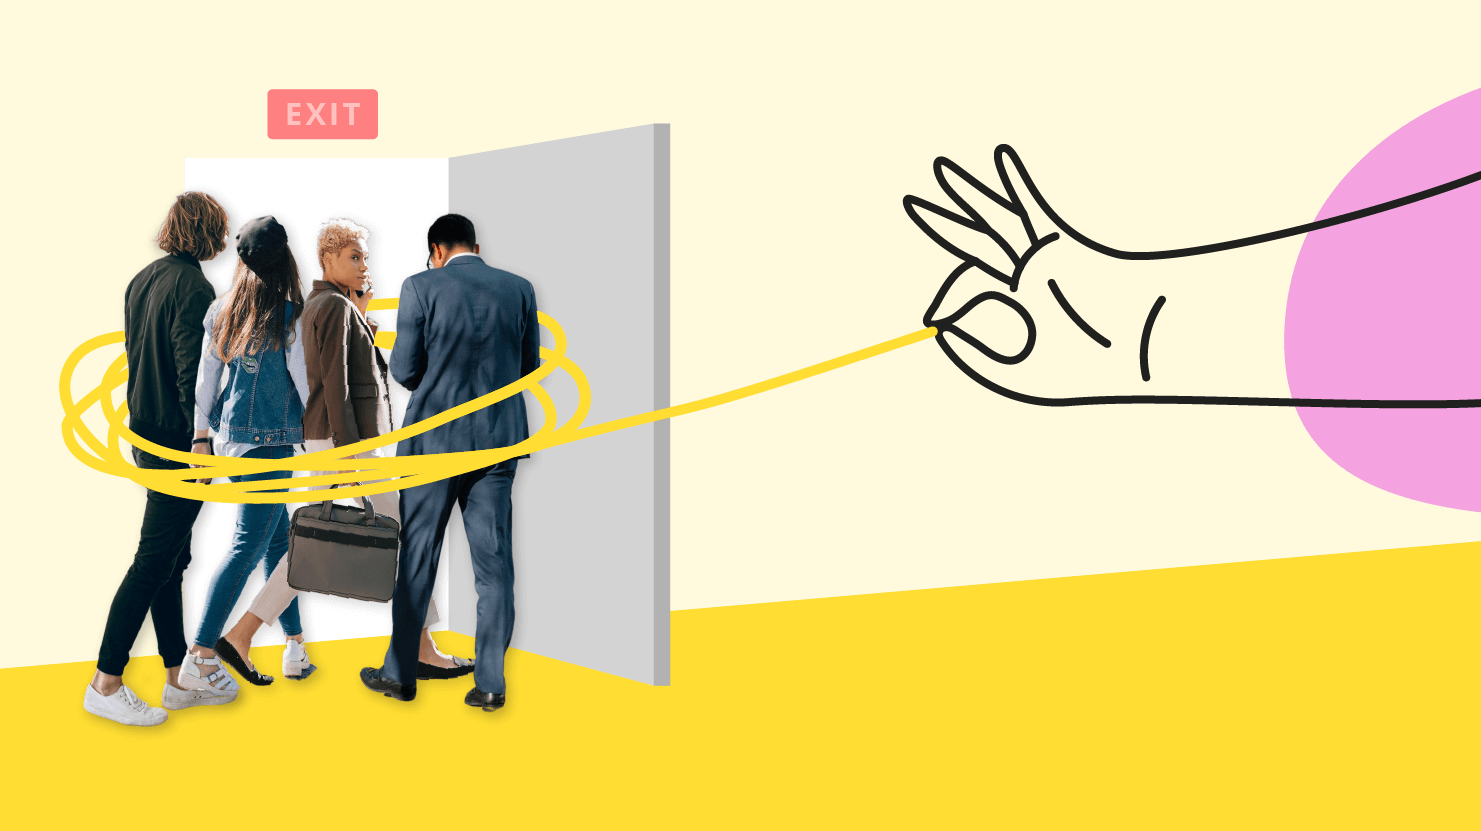

Our dataset is gotten from Kaggle https://www.kaggle.com/datasets/marikastewart/employee-turnover?resource=download and is from a large US company (no name given for privacy reasons).

## About the Data

The HR department has assembled data on almost 10,000 employees who left the company between 2016-2020. They used information from exit interviews, performance reviews, and employee records.

## Data Dictionary

Department- the department the employee belongs to.

Promoted- 1 if the employee was promoted in the previous 24 months, 0 otherwise.

Review- the composite score the employee received in their last evaluation.

Projects- how many projects the employee is involved in.

Salary- for confidentiality reasons, salary comes in three tiers: low, medium, high.

Tenure- how many years the employee has been at the company.

Satisfaction- a measure of employee satisfaction from surveys.

Bonus- 1 if the employee received a bonus in the previous 24 months, 0 otherwise.

Avg_hrs_month- the average hours the employee worked in a month.

Left- "yes" if the employee ended up leaving, "no" otherwise.



## Requirements: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
#Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Load Employee Turnover dataset

In [2]:
turnover=pd.read_csv('employee_churn_data.csv')
turnover

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


##EXPLORATORY DATA ANALYSIS

In [3]:
#First 5 rows
turnover.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [4]:
#Check data Dimensions
turnover.shape

(9540, 10)

In [5]:
#Overview of Columns, datatypes and null value counts
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


The data is clean and shows no null values.

In [6]:
#Statistical data of all numeric columns
turnover.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [7]:
#Checking for duplicate values
turnover.duplicated().sum()

0

# Univariate Analysis

Histograms to plot the distribution of all numerical features

array([[<Axes: title={'center': 'projects'}>,
        <Axes: title={'center': 'promoted'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'satisfaction'}>],
       [<Axes: title={'center': 'bonus'}>,
        <Axes: title={'center': 'avg_hrs_month'}>]], dtype=object)

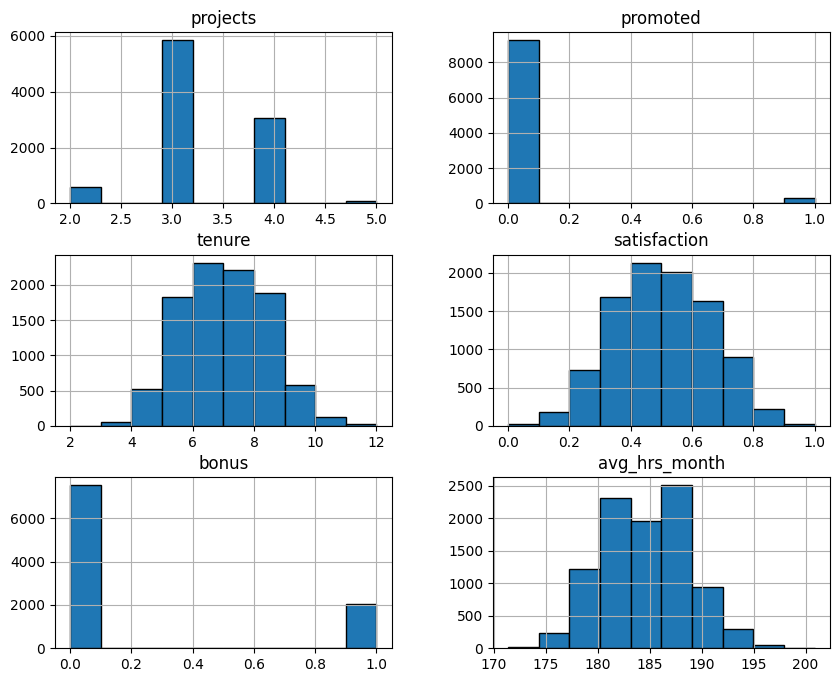

In [11]:
numerical_columns= ['projects', 'promoted', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month']
turnover[numerical_columns].hist(bins=10, edgecolor='black', figsize=(10, 8))

1. Projects: Most individuals have worked on 3 or 4 projects. Fewer individuals have worked on 2 or 5 projects.
2. Promoted: The vast majority of individuals have not been promoted (value 0), with a small number having been promoted (value 1).
3. Tenure: The distribution of the number of years an individual has been with the company is roughly normal, with most individuals having a tenure of about 5 to 8 years. Fewer individuals have very short or very long tenures.
4. Satisfaction: The distribution is approximately normal, with a peak around a satisfaction level of 0.5. This indicates most individuals have a moderate level of satisfaction.
5. Bonus: individuals did not receive a bonus (value 0), while a smaller group did (value 1).
6. Avg_Hrs_Month: The distribution is roughly normal, centered around 185 to 190 hours per month. This suggests that most individuals work around this range of hours.

## General Insights:
Normal Distributions: The tenure, satisfaction, and average hours per month follow a roughly normal distribution, indicating most values are concentrated around the mean, with fewer instances at the extremes.

Binary Variables: The promoted and bonus variables are binary, and in both cases, the majority of the population falls into one category (not promoted and no bonus, respectively).

Workload: Most individuals have a moderate workload in terms of the number of projects and hours worked per month.

PIECHART :Distribution of employees who left

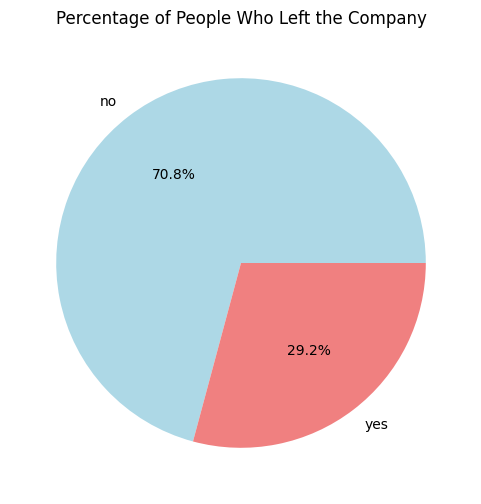

In [33]:
# Count the number of people who left and who stayed
left_counts = turnover['left'].value_counts()

# Labels for the pie chart
labels = ['no', 'yes']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(left_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Percentage of People Who Left the Company')
plt.show()

From the piechart we see that 70.8% of employees stayed, while 29.2% left.

In [22]:
sal_counts= turnover['salary'].value_counts()
sal_counts

,count
salary,
medium,6611
high,1548
low,1381


Checking value counts for each category

In [23]:
bon_counts= turnover['bonus'].value_counts()
bon_counts

,count
bonus,
0,7517
1,2023


In [24]:
prom_counts= turnover['promoted'].value_counts()
prom_counts

,count
promoted,
0,9251
1,289


In [25]:
dept_counts= turnover['department'].value_counts()
dept_counts

,count
department,
sales,1883
retail,1541
operations,1522
engineering,1516
marketing,802
support,735
admin,423
finance,402
logistics,360


In [27]:
proj_counts= turnover['projects'].value_counts()
proj_counts

,count
projects,
3,5833
4,3058
2,578
5,71


In [28]:
ten_counts= turnover['tenure'].value_counts()
ten_counts

,count
tenure,
6.0,2313
7.0,2209
8.0,1888
5.0,1823
9.0,578
4.0,518
10.0,127
3.0,57
11.0,23


# Bivariate Analysis

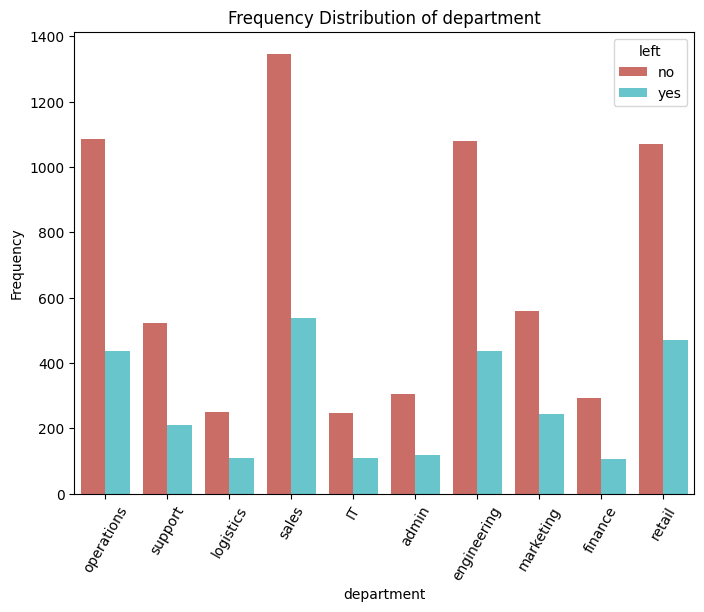

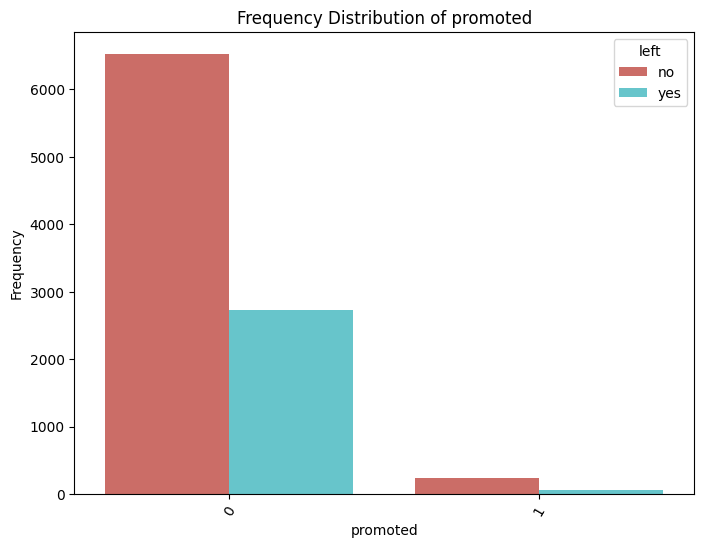

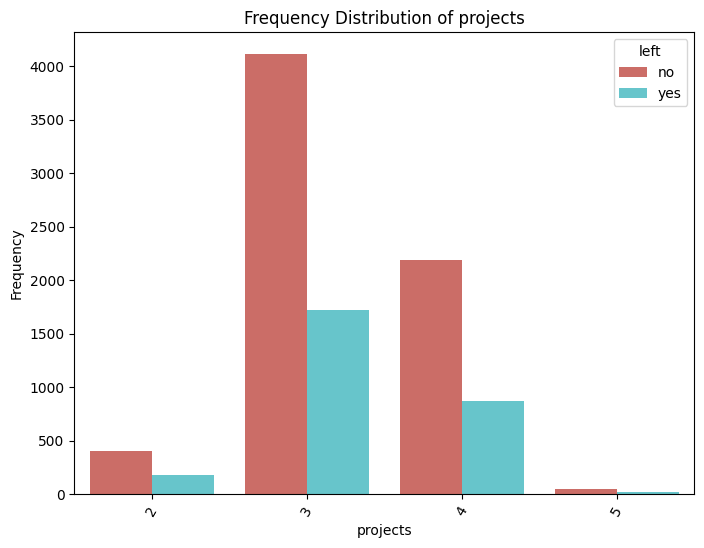

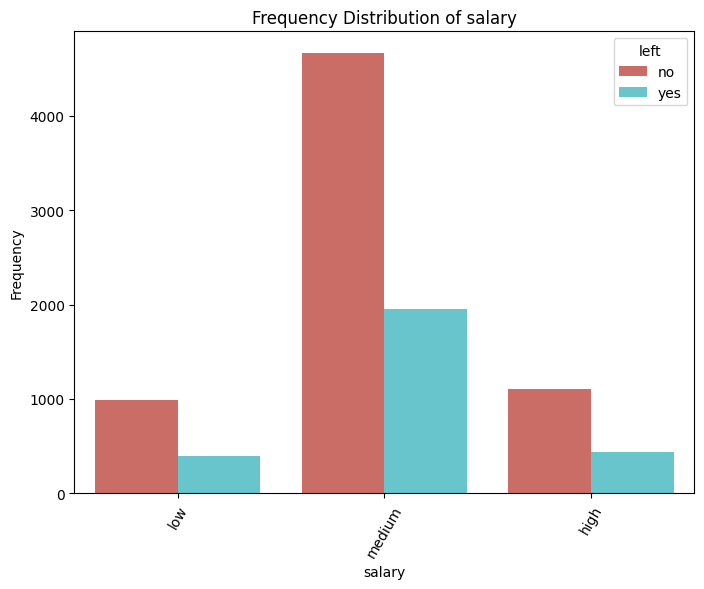

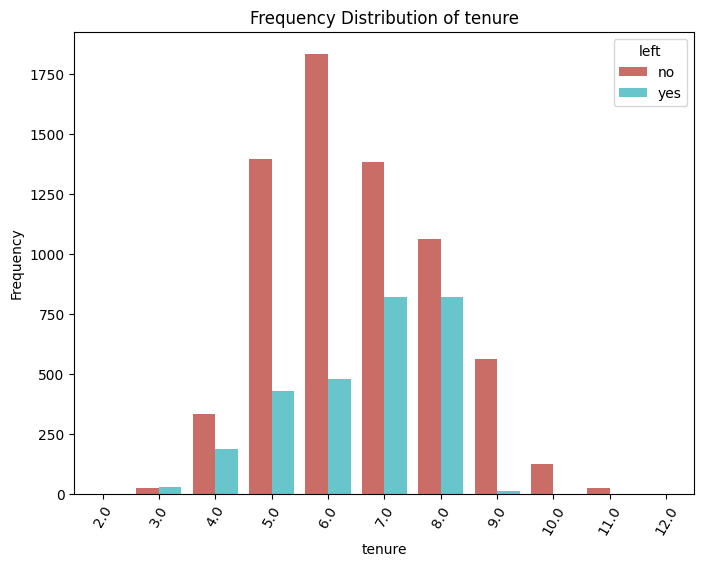

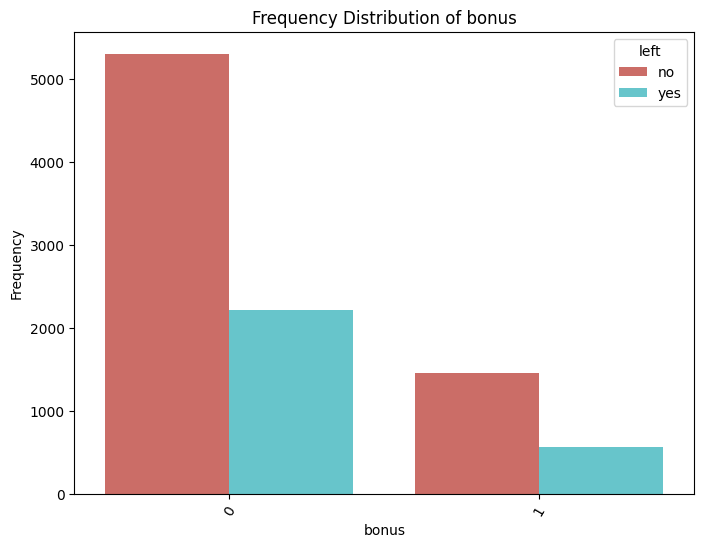

In [20]:
# List of categorical columns
columns = ['department', 'promoted', 'projects',	'salary', 'tenure', 'bonus']

# Plotting bar charts for each categorical feature
for column in columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.countplot(data=turnover, x=column, hue= 'left', palette='hls')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=60)  # Rotate x-axis labels for better readability if needed
    plt.show()

# INSIGHTS

##Departments:

Sales, operations, and retail are the largest departments, and although more employees stayed in these departments, the number who left is still notable.

Logistics and support departments have higher proportions of employees leaving. These departments might benefit from a review of working conditions or incentives to reduce turnover.

Conclusion:
The company might consider department-specific strategies to reduce attrition, especially focusing on large departments like sales, operations, and retail, where the absolute number of employees leaving is higher.

For departments like logistics and support, where the attrition rate seems higher relative to the size of the department, it might be essential to investigate the underlying causes of employee dissatisfaction or other factors leading to turnover.

## Promoted

The data shows that the company rarely promotes employees as the percentage of employees who were not promoted cover 97% of the total workforce with a 3% minority being promoted.

Conclusion: employees may feel undervalued and are choosing to leave as there is the absolute number of employees leaving fall under those who haven't been promoted.

## Projects

There is a significant number of employees who take on 3-4 projects.
These also contributes vastly to the number of employees leaving, compared to those who take on 2 and 5.


## Salary:
Employees with low or medium salaries are more likely to leave the company than those with high salaries.
This suggests a possible correlation between salary level and employee retention, where higher salaries might contribute to lower attrition rates.
Employee Distribution:

The majority of the workforce is in the medium salary category. This makes it crucial for the company to focus on retention strategies for this group.
Conclusion:
To reduce attrition, the company might consider increasing salaries or providing additional benefits, especially for those in the lower and medium salary brackets, as these groups show higher rates of leaving. Additionally, further analysis could be done to understand other factors contributing to employee attrition.

## Tenure

The employees who have been with the company between 5-8years make up a majority of the workforce and we see the rise in employee's leaving in that characterictic as against the others who are new in the company or who have stayed longer than 8years.

## Bonus

Employees who do not receive bonuses have a higher tendency to leave than those who do.
while there is a notable number of those that stay, we can also see the rise in those who leave